# Topic Modelling Visualizations

I want to visualize
* the topics of all the articles
* the relative frequencies of comments on different topics
* the relationship between topics in comments to topics in articles
* the relationship between topics in articles and the constructiveness of the comments
* the relationship between topics in articles and the toxicity of the comments
* the relationship between topics in comments and the constructiveness of the comments
* the relationship between topics in comments and the toxicity of the comments
* general trends in the constructiveness of the comments
* general trends in the toxicity of the comments

In [133]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re, math
import operator

In [142]:
TOPIC_MODELLING_DIR = '/Users/vasundhara/sfuvault/Discourse-Lab/Data/Topic_Modelling/'
SOCC_DIR = '/Users/vasundhara/sfuvault/Discourse-Lab/Data/Globe_and_Mail/'

In [58]:
def deSerializeList(line):
    return [token[1:-1] for token in line.split(', ')]

In [125]:
def deSerializeListOfTuples(line):
    tokens = re.findall('(\d+(\.\d+)*)', line.rstrip()[1:-1])
    tokens = [t for t,_ in tokens]
    tokens_list = []
    for i in range(math.ceil(len(tokens)/2)):
        tokens_list.append((int(tokens[2*i]), float(tokens[2*i + 1])))
    return tokens_list
#     return [token[1:-1] for token in line.split(', ')]

In [59]:
tokens_lists = []

with open(TOPIC_MODELLING_DIR + 'topics.txt', 'r+') as fo:
    for line in fo.readlines():
        stripped = line.rstrip()
        match = re.match('\d+: (.*)', stripped)
        tokens_lists.append(deSerializeList(match.group(1)[1:-1]))
        print(stripped)

0: ['province', 'McGuinty', 'Drummond', 'gas', 'Duncan', 'point', 'budget', 'bill', 'game', 'premier']
1: ['Romney', 'school', 'local', 'life', 'personal', 'North', 'air', 'home', 'ministers', 'mother']
2: ['city', 'Ford', 'mayor', 'report', 'police', 'sector', 'work', 'Toronto', 'budget', 'costs']
3: ['NDP', 'Ontario', 'government', 'party', 'Harper', 'Mulcair', 'health', 'Liberals', 'spending', 'tax']
4: ['China', 'Santorum', 'Gingrich', 'leadership', 'Republican', 'trade', 'free', 'human', 'Republicans', 'House']
5: ['program', 'global', 'Charest', 'death', 'talk', 'Trade', 'legislation', 'wanted', 'apparently', 'Commons']
6: ['Redford', 'candidates', 'ago', 'problem', 'sex', 'matter', 'community', 'months', 'hold', 'kind']
7: ['aboriginal', 'natural', 'communities', 'protection', 'reserves', 'lead', 'reality', 'leading', 'Crown', 'suggest']
8: ['Obama', 'age', 'Internet', 'judge', 'Senate', 'Thomas', 'conservatives', 'raised', 'media', 'success']
9: ['public', 'people', 'system', '

In [130]:
socc_articles_topics = []
with open(TOPIC_MODELLING_DIR + 'results/socc_articles_topics.txt', 'r+') as fo:
    for line in fo.readlines():
        socc_articles_topics.append(deSerializeListOfTuples(line.rstrip()))

In [135]:
socc_article_main_topics = []
for socc_article_topics in socc_articles_topics:
    main_topic = max(socc_article_topics, key=operator.ite=mgetter(1))[0]
#     print(main_topic)
    socc_article_main_topics.append(main_topic)

In [140]:
socc_comments_topics = []
with open(TOPIC_MODELLING_DIR + 'results/socc_comments_topics.txt', 'r+') as fo:
    for line in fo.readlines():
        socc_comments_topics.append(deSerializeListOfTuples(line.rstrip()))

In [193]:
socc_comments_main_topics = []
for socc_comment_topics in socc_comments_topics:
    main_topic = max(socc_comment_topics, key=operator.itemgetter(1))[0]
#     print(main_topic)
    socc_comments_main_topics.append(main_topic)

In [146]:
socc_articles_df = pd.read_csv(SOCC_DIR + 'CSVs/gnm_articles.csv', low_memory=False)

In [179]:
socc_articles_merged = pd.merge(socc_articles_df,
                               pd.DataFrame(socc_article_main_topics).rename({0 : 'main_topic'}, axis=1),
                               left_index=True, right_index=True)

In [180]:
socc_comments_df = pd.read_csv(SOCC_DIR + 'CSVs/gnm_comments.csv', low_memory=False)

In [181]:
comment_counts_df = socc_comments_df.groupby('article_id').count()['comment_text'].rename('comment_count').reset_index()

In [182]:
socc_articles_merged = pd.merge(socc_articles_merged, comment_counts_df, on='article_id', how='left')

In [183]:
socc_articles_merged.fillna(value={'comment_count' : 0}, inplace=True)

In [190]:
merged = socc_articles_merged.groupby('main_topic')

In [191]:
merged.sum()['comment_count'] / merged.count()['comment_count']

main_topic
0     121.500000
1     179.666667
2      60.755981
3      79.349968
4      89.136364
5     766.000000
6     102.486486
7     203.166667
8     191.095238
9      56.640464
10     73.888889
11     81.935780
12     48.915323
13     57.293005
14    113.732558
Name: comment_count, dtype: float64

In [192]:
merged.sum()['ntop_level_comments'] / merged.count()['comment_count']

main_topic
0      60.428571
1      69.000000
2      24.645933
3      31.826279
4      33.969697
5     306.000000
6      39.783784
7      78.000000
8      84.000000
9      23.771773
10     30.700000
11     30.012844
12     20.556452
13     24.266165
14     41.593023
dtype: float64

In [209]:
(pd.DataFrame(socc_comments_main_topics).rename({0 : 'main_topic'}, axis=1)['main_topic'].value_counts() / socc_articles_merged['main_topic'].value_counts()).sort_values()

13      39.557137
12      60.915323
10      70.666667
11      71.829358
9       73.196070
3       81.037271
4      100.518182
2      101.574163
14     161.360465
8      242.619048
6      385.459459
7      523.500000
1      653.833333
0      703.857143
5     3056.000000
Name: main_topic, dtype: float64

In [227]:
socc_constructiveness = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/Globe_and_Mail/Globe_analysis/socc_constructiveness_predictions.csv')

In [228]:
socc_comments_stopped = pd.read_csv(TOPIC_MODELLING_DIR + 'stopwords_removed/socc_comments.csv', header=None).rename({0 : 'stopped_text'}, axis=1)

In [229]:
socc_combined = socc_constructiveness.join(socc_comments_stopped).dropna()

In [230]:
socc_const_plot = socc_combined.groupby('constructive_prediction').mean().reset_index().melt(id_vars=['constructive_prediction']).rename({'variable' : 'Feature', 'value' : 'Value', 'constructive_prediction' : 'Constructive'}, axis=1)
socc_const_plot.head()

,Constructive,Feature,Value
0,0,has_conjunctions_and_connectives,0.850194
1,1,has_conjunctions_and_connectives,0.999728
2,0,has_stance_adverbials,0.096266
3,1,has_stance_adverbials,0.350190
4,0,has_reasoning_verbs,0.668165


In [231]:
set(list(socc_const_plot['Feature']))

{'average_word_length',
 'avg_words_per_sent',
 'has_conjunctions_and_connectives',
 'has_modals',
 'has_reasoning_verbs',
 'has_shell_nouns',
 'has_stance_adverbials',
 'length',
 'nSents',
 'named_entity_count',
 'ncaps',
 'noov',
 'personal_exp_score',
 'readability_score'}

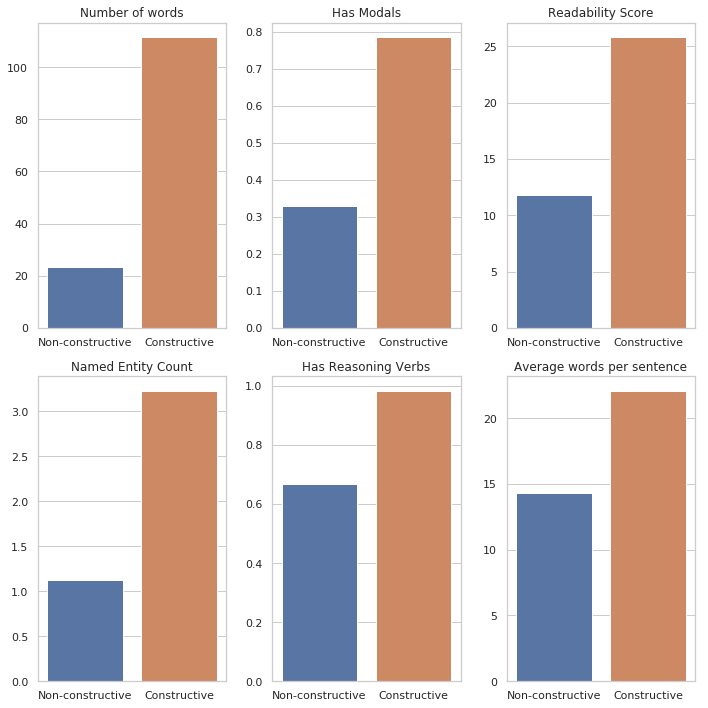

In [275]:
fig = plt.figure(figsize=(10,10))

features = ['length', 'has_modals', 'readability_score', 'named_entity_count', 'has_reasoning_verbs', 'avg_words_per_sent']
human_readable = ['Number of words', 'Has Modals', 'Readability Score', 'Named Entity Count', 'Has Reasoning Verbs', 'Average words per sentence']
# features = set(list(socc_const_plot['Feature']))
axes = []

for index,feature in enumerate(features):
    ax = plt.subplot(2, 3, index+1)
    ax.set_title(human_readable[index])#, fontsize=30)
    sns.barplot(socc_const_plot[socc_const_plot['Feature'] == feature]['Constructive'],
                socc_const_plot[socc_const_plot['Feature'] == feature]['Value'])#,
#                 palette=['yellow', 'blue'])
    plt.xlabel('')
    plt.ylabel('')
    ax.set_xticklabels(['Non-constructive', 'Constructive'])
plt.tight_layout()
plt.savefig('constructiveness_system.png')

In [233]:
def flatten(series):
    tokens = list(word
     for comment in series.str.split()
     for word in comment)
    return pd.DataFrame(tokens).rename({0 : 'token'}, axis=1)

In [244]:
flattened = flatten(socc_combined.groupby('constructive_prediction').get_group(0)['stopped_text'])
frequencies_non_constructive = flattened['token'].value_counts().head(100).reset_index().rename({'index' : 'token', 'token' : 'frequency'}, axis=1)
frequencies_non_constructive.head()

,token,frequency
0,people,69230
1,Canada,64639
2,Harper,50718
3,government,44924
4,time,36284


In [245]:
non_constructive_text = ''
min_freq = frequencies_non_constructive['frequency'].min()
for i,row in frequencies_non_constructive.iterrows():
    non_constructive_text += (row['token'] + ' ') * math.floor(row['frequency'] / min_freq)
    
with open('non_constructive_text.txt', 'w+') as fo:
    fo.write(non_constructive_text)

In [246]:
flattened = flatten(socc_combined.groupby('constructive_prediction').get_group(1)['stopped_text'])
frequencies_constructive = flattened['token'].value_counts().head(100).reset_index().rename({'index' : 'token', 'token' : 'frequency'}, axis=1)
frequencies_constructive.head()

,token,frequency
0,people,42862
1,Canada,39628
2,Harper,31015
3,government,28038
4,time,22455


In [247]:
constructive_text = ''
min_freq = frequencies_constructive['frequency'].min()
for i,row in frequencies_constructive.iterrows():
    constructive_text += (row['token'] + ' ') * math.floor(row['frequency'] / min_freq)
    
with open('constructive_text.txt', 'w+') as fo:
    fo.write(constructive_text)

In [248]:
socc_toxicity = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/Globe_and_Mail/Globe_analysis/socc_toxicity_predictions.csv', low_memory=False)

In [249]:
socc_toxicity[['comment_text', 'TOXICITY_probability']].head()

,comment_text,TOXICITY_probability
0,ANy physician or specialist will put a block o...,0.502267
1,"I don't mess around in YOUR contract, don't me...",0.230638
2,...And the CFIB is an entirely balanced source...,0.118950
3,ManCityFC: If you think its 'baloney' then you...,0.252292
4,"If you want the market to decide, get ready fo...",0.104049


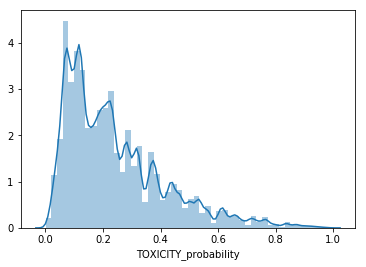

In [250]:
sns.distplot(socc_toxicity['TOXICITY_probability'])

In [259]:
combined_socc = socc_constructiveness.merge(socc_toxicity, left_on='pp_comment_text', right_on='comment_text')[['pp_comment_text', 'constructive_prediction', 'TOXICITY_probability']].drop_duplicates()

In [260]:
tyee_constructiveness = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Tyee_data/Tyee analysis/tyee_constructiveness_results.csv')
tyee_toxicity = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Tyee_data/Tyee analysis/tyee_toxicity_results.csv')
combined_tyee = tyee_constructiveness.merge(tyee_toxicity, on='pp_comment_text', how='outer')[['pp_comment_text', 'constructive_prediction', 'TOXICITY_probability']].drop_duplicates().dropna()

In [262]:
conv_constructiveness = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Conversation_data/Conversation analysis/conversation_constructiveness_results.csv')
conv_toxicity = pd.read_csv('/Users/vasundhara/sfuvault/Discourse-Lab/Data/The_Conversation_data/Conversation analysis/conversation_toxicity_results.csv')
combined_conv = conv_constructiveness.merge(conv_toxicity, on='pp_comment_text', how='outer')[['pp_comment_text', 'constructive_prediction', 'TOXICITY_probability']].drop_duplicates().dropna()

In [263]:
combined = pd.concat([combined_socc, combined_tyee, combined_conv], axis=0)

In [266]:
combined['toxicity_category'] = ((np.floor(combined['TOXICITY_probability'] * 100.0) - (np.floor(combined['TOXICITY_probability'] * 100.0) % 10)) + 5).astype(int)

In [270]:
combined = combined[combined['TOXICITY_probability'] > 0]

In [271]:
combined.head()

,pp_comment_text,constructive_prediction,TOXICITY_probability,toxicity_category
0,I think the program needs some work and probab...,1.0,0.122059,15
1,This is just 'offshoring' in reverse as well a...,0.0,0.118150,15
2,How do you spell exploitation? This is a disgu...,0.0,0.433540,45
3,TFWs have a place in the economy. Most Canadia...,1.0,0.129228,15
4,Why should temporary workers get paid more?? H...,1.0,0.159348,15


In [361]:
grouped = combined.groupby(['constructive_prediction', 'toxicity_category']).count().reset_index()
pivoted = grouped.pivot('constructive_prediction', 'toxicity_category')['pp_comment_text']

In [362]:
grouped.head()

,constructive_prediction,toxicity_category,pp_comment_text,TOXICITY_probability
0,0.0,5,212134,212134
1,0.0,15,212419,212419
2,0.0,25,130101,130101
3,0.0,35,77035,77035
4,0.0,45,45179,45179


In [363]:
label_df = pd.DataFrame([[0, 'Non-constructive'], [1, 'Constructive']], columns=['constructive_prediction', 'Prediction'])
grouped = grouped.merge(label_df, how='left', on='constructive_prediction')

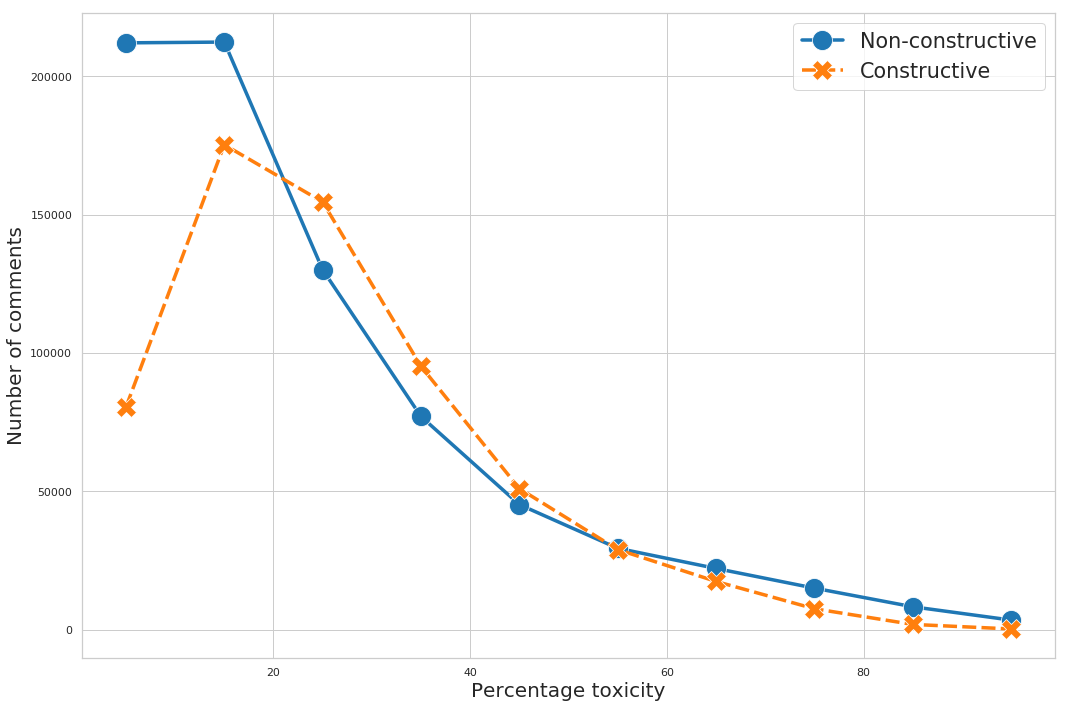

In [367]:
sns.set_context('talk')
sns.set(rc={'figure.figsize':(15,10)})
sns.set(style="whitegrid")
sns.lineplot(data=grouped , x='toxicity_category', y='pp_comment_text',
             hue='Prediction', style='Prediction',
             palette="tab10", linewidth=3.5, markers=True,
             legend=False, markersize=20)
plt.xlabel('Percentage toxicity', fontsize=20)
plt.ylabel('Number of comments', fontsize=20)
plt.tight_layout()
plt.legend(['Non-constructive', 'Constructive'], fontsize='xx-large')
# plt.show()
plt.savefig('comments.png')

In [328]:
combined_socc.columns

Index(['pp_comment_text', 'constructive_prediction', 'TOXICITY_probability'], dtype='object')

In [345]:
socc_everything = combined_socc.merge(socc_comments_df, left_on='pp_comment_text', right_on='comment_text')
socc_everything = socc_everything.merge(pd.DataFrame(socc_article_main_topics).rename({0 : 'main_topic'}, axis=1),
                                        left_index=True, right_index=True)
socc_everything = socc_everything.merge(socc_articles_merged[['article_id', 'main_topic']].rename({'main_topic' : 'article_main_topic'}, axis=1),
                      on='article_id')

In [358]:
socc_everything.groupby('article_main_topic').mean()['constructive_prediction'].sort_values(ascending=False)

article_main_topic
6     0.409091
11    0.398734
9     0.369276
3     0.361017
2     0.344828
13    0.335303
12    0.316268
14    0.277778
10    0.000000
8     0.000000
7     0.000000
5     0.000000
4     0.000000
1     0.000000
0     0.000000
Name: constructive_prediction, dtype: float64

In [357]:
socc_everything.groupby('article_main_topic').mean()['TOXICITY_probability'].sort_values(ascending=False)

article_main_topic
12    0.300246
9     0.233031
3     0.225076
11    0.207627
13    0.195138
2     0.165480
6     0.154617
14    0.132549
4     0.049839
10    0.049510
1     0.045962
8     0.042367
7     0.037913
5     0.037913
0     0.037913
Name: TOXICITY_probability, dtype: float64